In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
data = pd.read_csv("Existing_Base.csv")

In [161]:
data.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   family_income                    10155 non-null  object 
 8   self_employed                    10155 non-null  object 
 9   self_employed_partner            10155 non-null  object 
 10  year_last_moved                  10155 non-null  int64  
 11  TVarea                           10155 non-null  object 
 12  post_code         

In [163]:
data['Revenue Grid'].value_counts(normalize = True)

2    0.893058
1    0.106942
Name: Revenue Grid, dtype: float64

In [164]:
data.children.value_counts()

Zero    6208
1       1848
2       1607
3        473
4+        19
Name: children, dtype: int64

In [165]:
data.age_band.value_counts()

45-50      1359
36-40      1134
41-45      1112
31-35      1061
51-55      1052
55-60      1047
26-30       927
61-65       881
65-70       598
22-25       456
71+         410
18-21        63
Unknown      55
Name: age_band, dtype: int64

In [166]:
data.family_income.value_counts(),data.family_income.nunique()

(>=35,000             2517
 <27,500, >=25,000    1227
 <30,000, >=27,500     994
 <25,000, >=22,500     833
 <20,000, >=17,500     683
 <12,500, >=10,000     677
 <17,500, >=15,000     634
 <15,000, >=12,500     629
 <22,500, >=20,000     590
 <10,000, >= 8,000     563
 < 8,000, >= 4,000     402
 < 4,000               278
 Unknown               128
 Name: family_income, dtype: int64,
 13)

In [167]:
data.year_last_moved.value_counts(),data.year_last_moved.nunique()

(1997    680
 1996    654
 1994    542
 1998    538
 1995    492
        ... 
 1921      1
 1944      1
 1909      1
 1916      1
 1911      1
 Name: year_last_moved, Length: 95, dtype: int64,
 95)

In [168]:
year_not_zero = data.loc[data['year_last_moved']>=10,'year_last_moved']

<AxesSubplot:xlabel='Revenue Grid', ylabel='year_last_moved'>

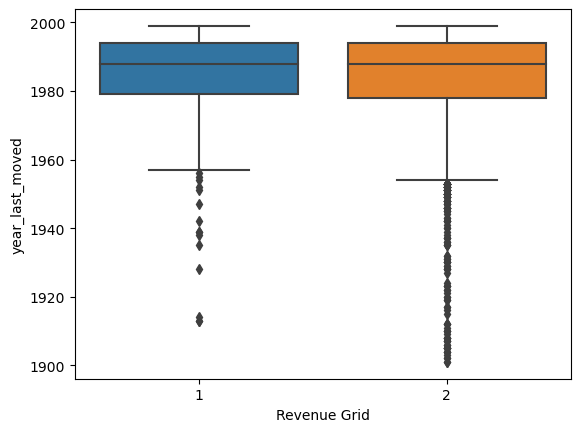

In [169]:

sns.boxplot(x = data['Revenue Grid'],y = year_not_zero)


In [170]:
year_not_zero.value_counts()

1997    680
1996    654
1994    542
1998    538
1995    492
       ... 
1921      1
1944      1
1909      1
1924      1
1911      1
Name: year_last_moved, Length: 94, dtype: int64

In [171]:
data['TVarea'].value_counts()

Central          1618
Carlton          1541
Meridian         1226
Yorkshire        1042
Granada          1039
HTV               845
Anglia            751
Tyne Tees         536
Scottish TV       520
TV South West     363
Grampian          227
Unknown           189
Ulster            159
Border             99
Name: TVarea, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'HTV'),
  Text(1, 0, 'Granada'),
  Text(2, 0, 'Tyne Tees'),
  Text(3, 0, 'Central'),
  Text(4, 0, 'Scottish TV'),
  Text(5, 0, 'Anglia'),
  Text(6, 0, 'Carlton'),
  Text(7, 0, 'Meridian'),
  Text(8, 0, 'Yorkshire'),
  Text(9, 0, 'Grampian'),
  Text(10, 0, 'TV South West'),
  Text(11, 0, 'Ulster'),
  Text(12, 0, 'Border'),
  Text(13, 0, 'Unknown')])

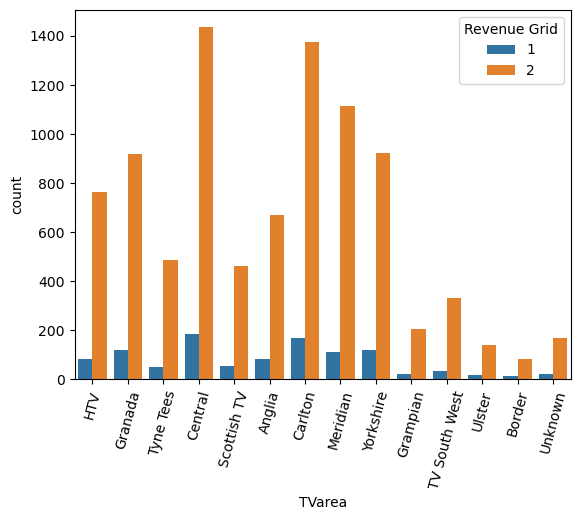

In [172]:
sns.countplot(x = 'TVarea',hue ='Revenue Grid',data =data,dodge =True,hue_order = [1,2])
plt.xticks(rotation = 75)

In [173]:
tv_cross = pd.crosstab(index = data['TVarea'],columns = data['Revenue Grid'],margins = True)
tv_cross['High Percent'] = tv_cross[1]/tv_cross['All']
tv_cross

Revenue Grid,1,2,All,High Percent
TVarea,,,,
Anglia,83,668,751,0.110519
Border,14,85,99,0.141414
Carlton,168,1373,1541,0.109020
Central,184,1434,1618,0.113721
Grampian,22,205,227,0.096916
Granada,121,918,1039,0.116458
HTV,82,763,845,0.097041
Meridian,112,1114,1226,0.091354
Scottish TV,56,464,520,0.107692


In [174]:
cat_col = data.select_dtypes(include = object)
cat_name = list(cat_col)


for i in cat_name:
    
    unique = data[i].nunique()
    print('*********')
    print('Col:',i)
    print('Unique Value:',unique)

*********
Col: children
Unique Value: 5
*********
Col: age_band
Unique Value: 13
*********
Col: status
Unique Value: 5
*********
Col: occupation
Unique Value: 9
*********
Col: occupation_partner
Unique Value: 9
*********
Col: home_status
Unique Value: 5
*********
Col: family_income
Unique Value: 13
*********
Col: self_employed
Unique Value: 2
*********
Col: self_employed_partner
Unique Value: 2
*********
Col: TVarea
Unique Value: 14
*********
Col: post_code
Unique Value: 10040
*********
Col: post_area
Unique Value: 2039
*********
Col: gender
Unique Value: 3
*********
Col: region
Unique Value: 13


In [175]:
# data.drop('REF_NO',axis = 1 )

In [176]:
num_col = data.select_dtypes(include = np.number)
num_name = list(num_col)
len(num_name)

18

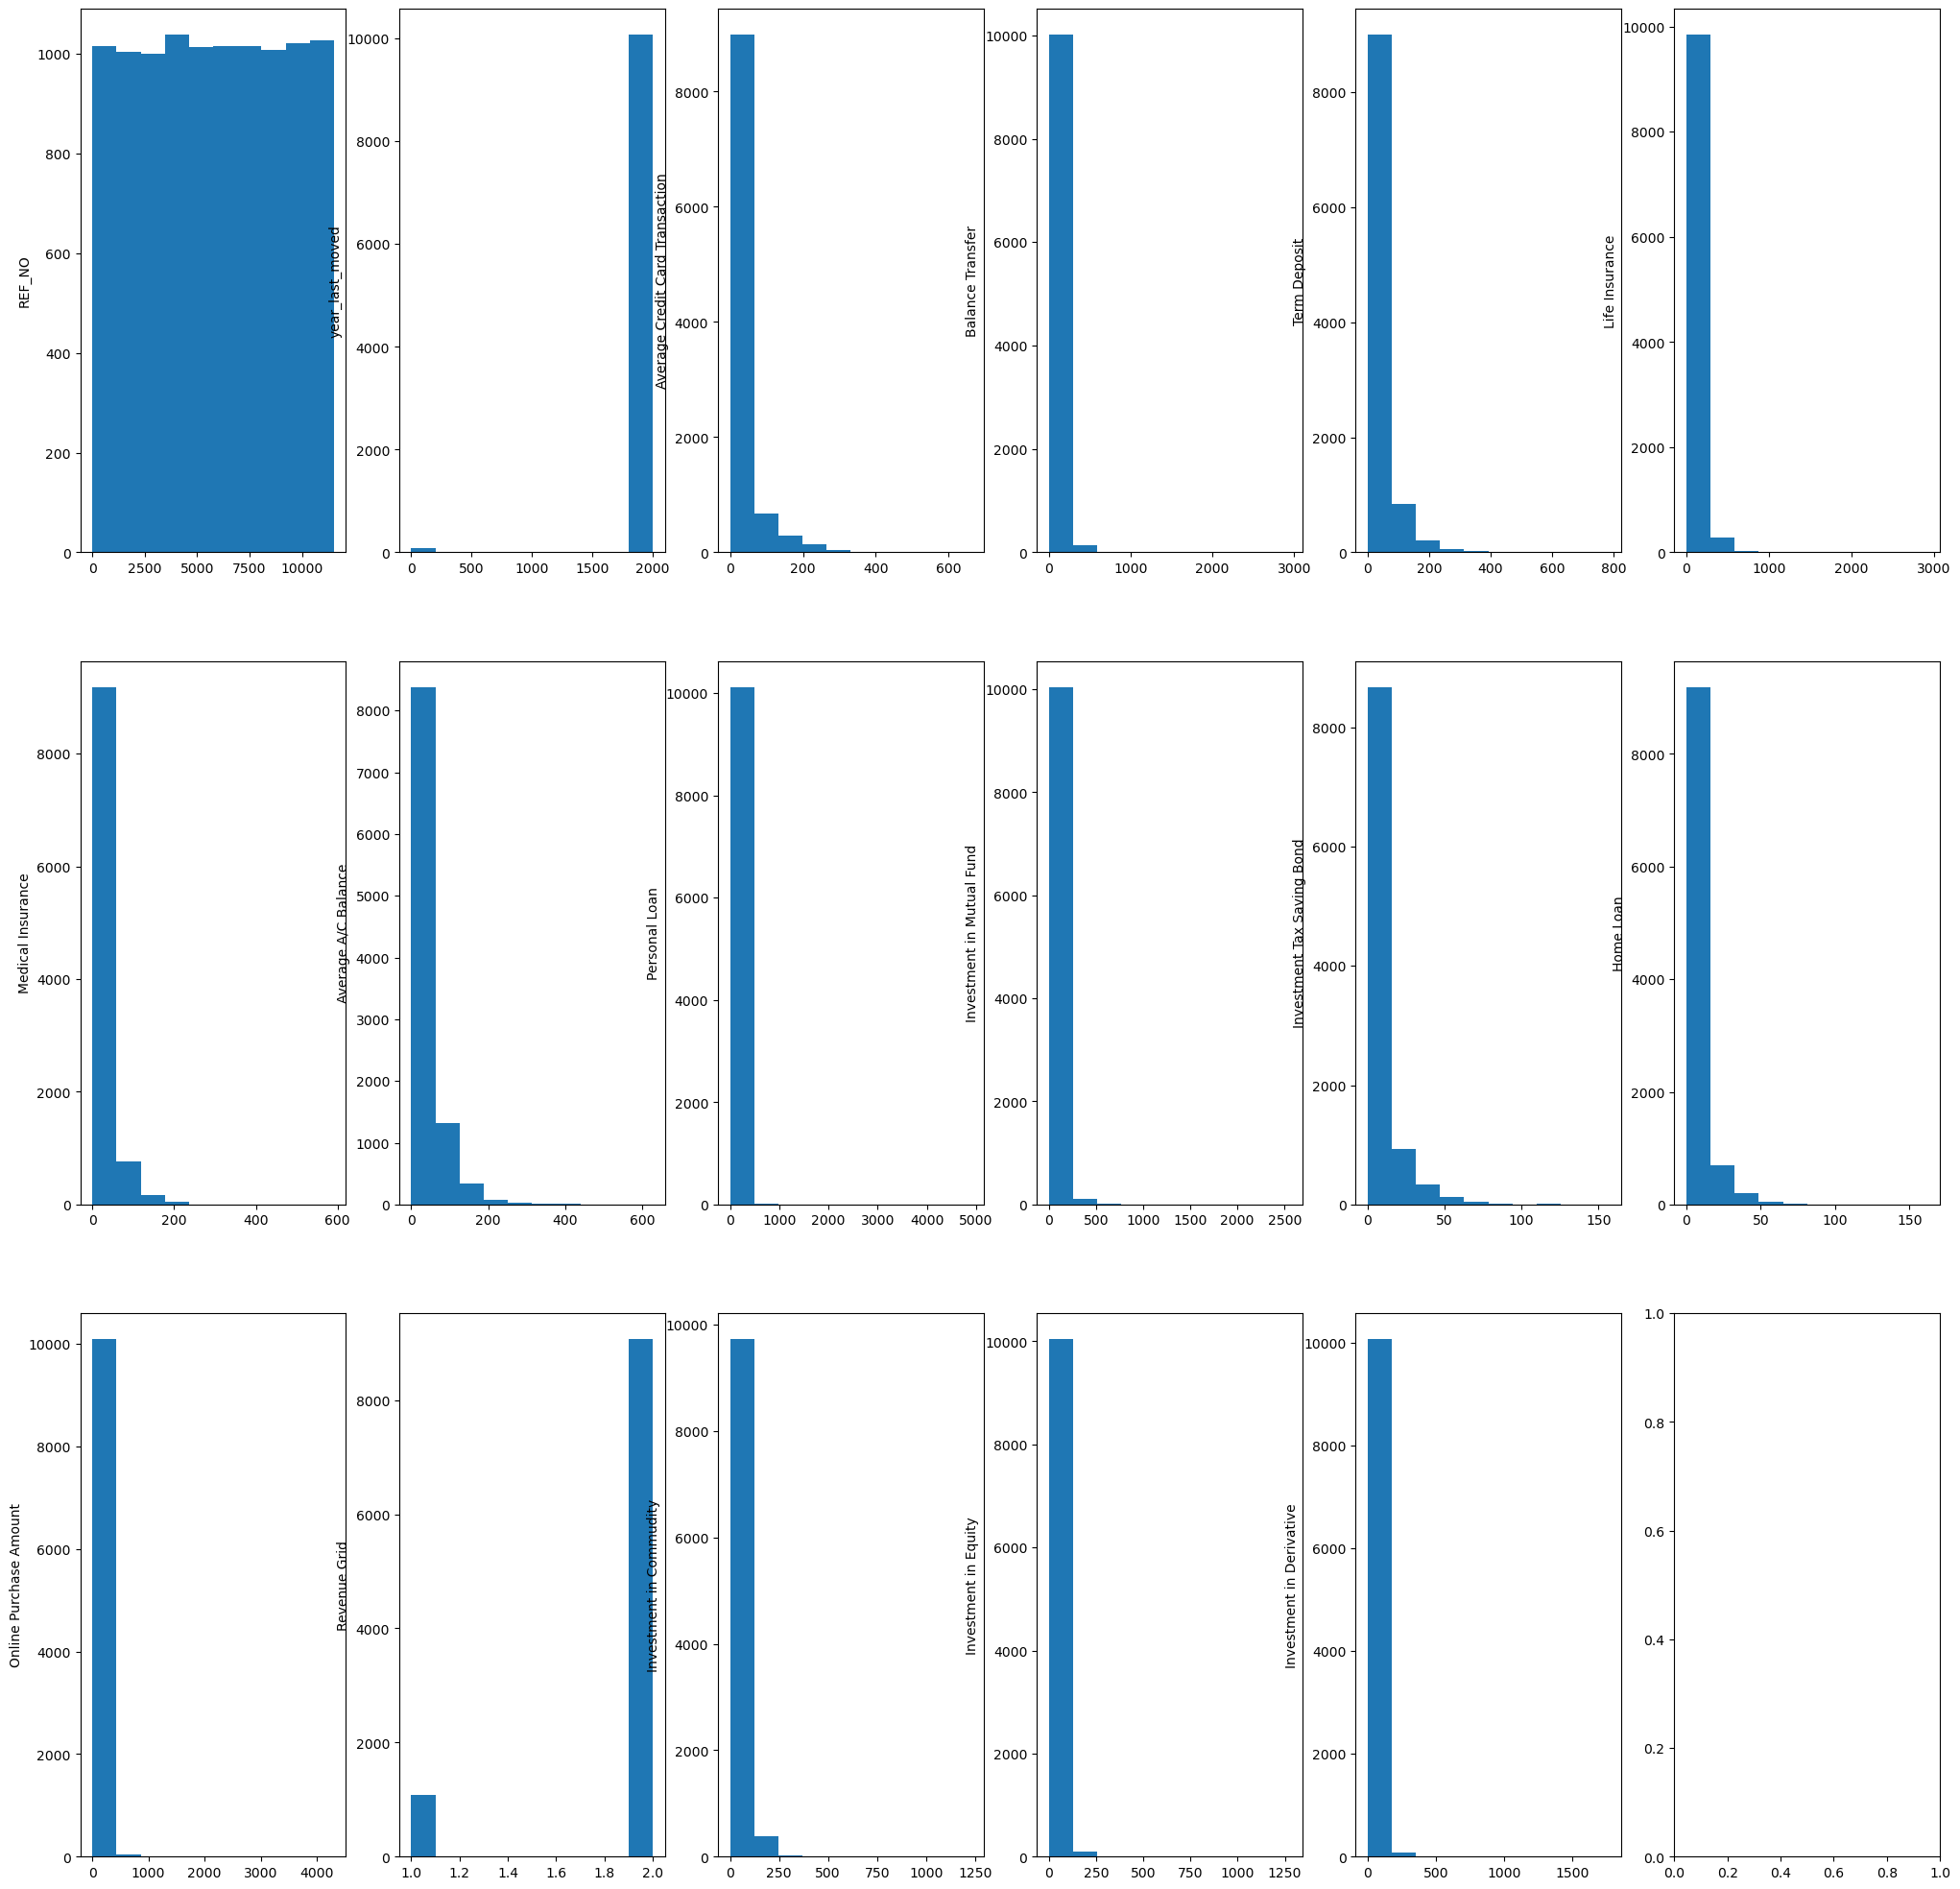

In [177]:

rows = 3 
col  = 6
col_index = 0
fig ,ax = plt.subplots(nrows = rows ,ncols = col,figsize = [25,25])
for i in range(rows):
    for j in range(col):
        if col_index < 17:
            ax[i][j].hist(x = data[num_name[col_index]])
            ax[i][j].set_ylabel(num_name[col_index])
            col_index = col_index + 1

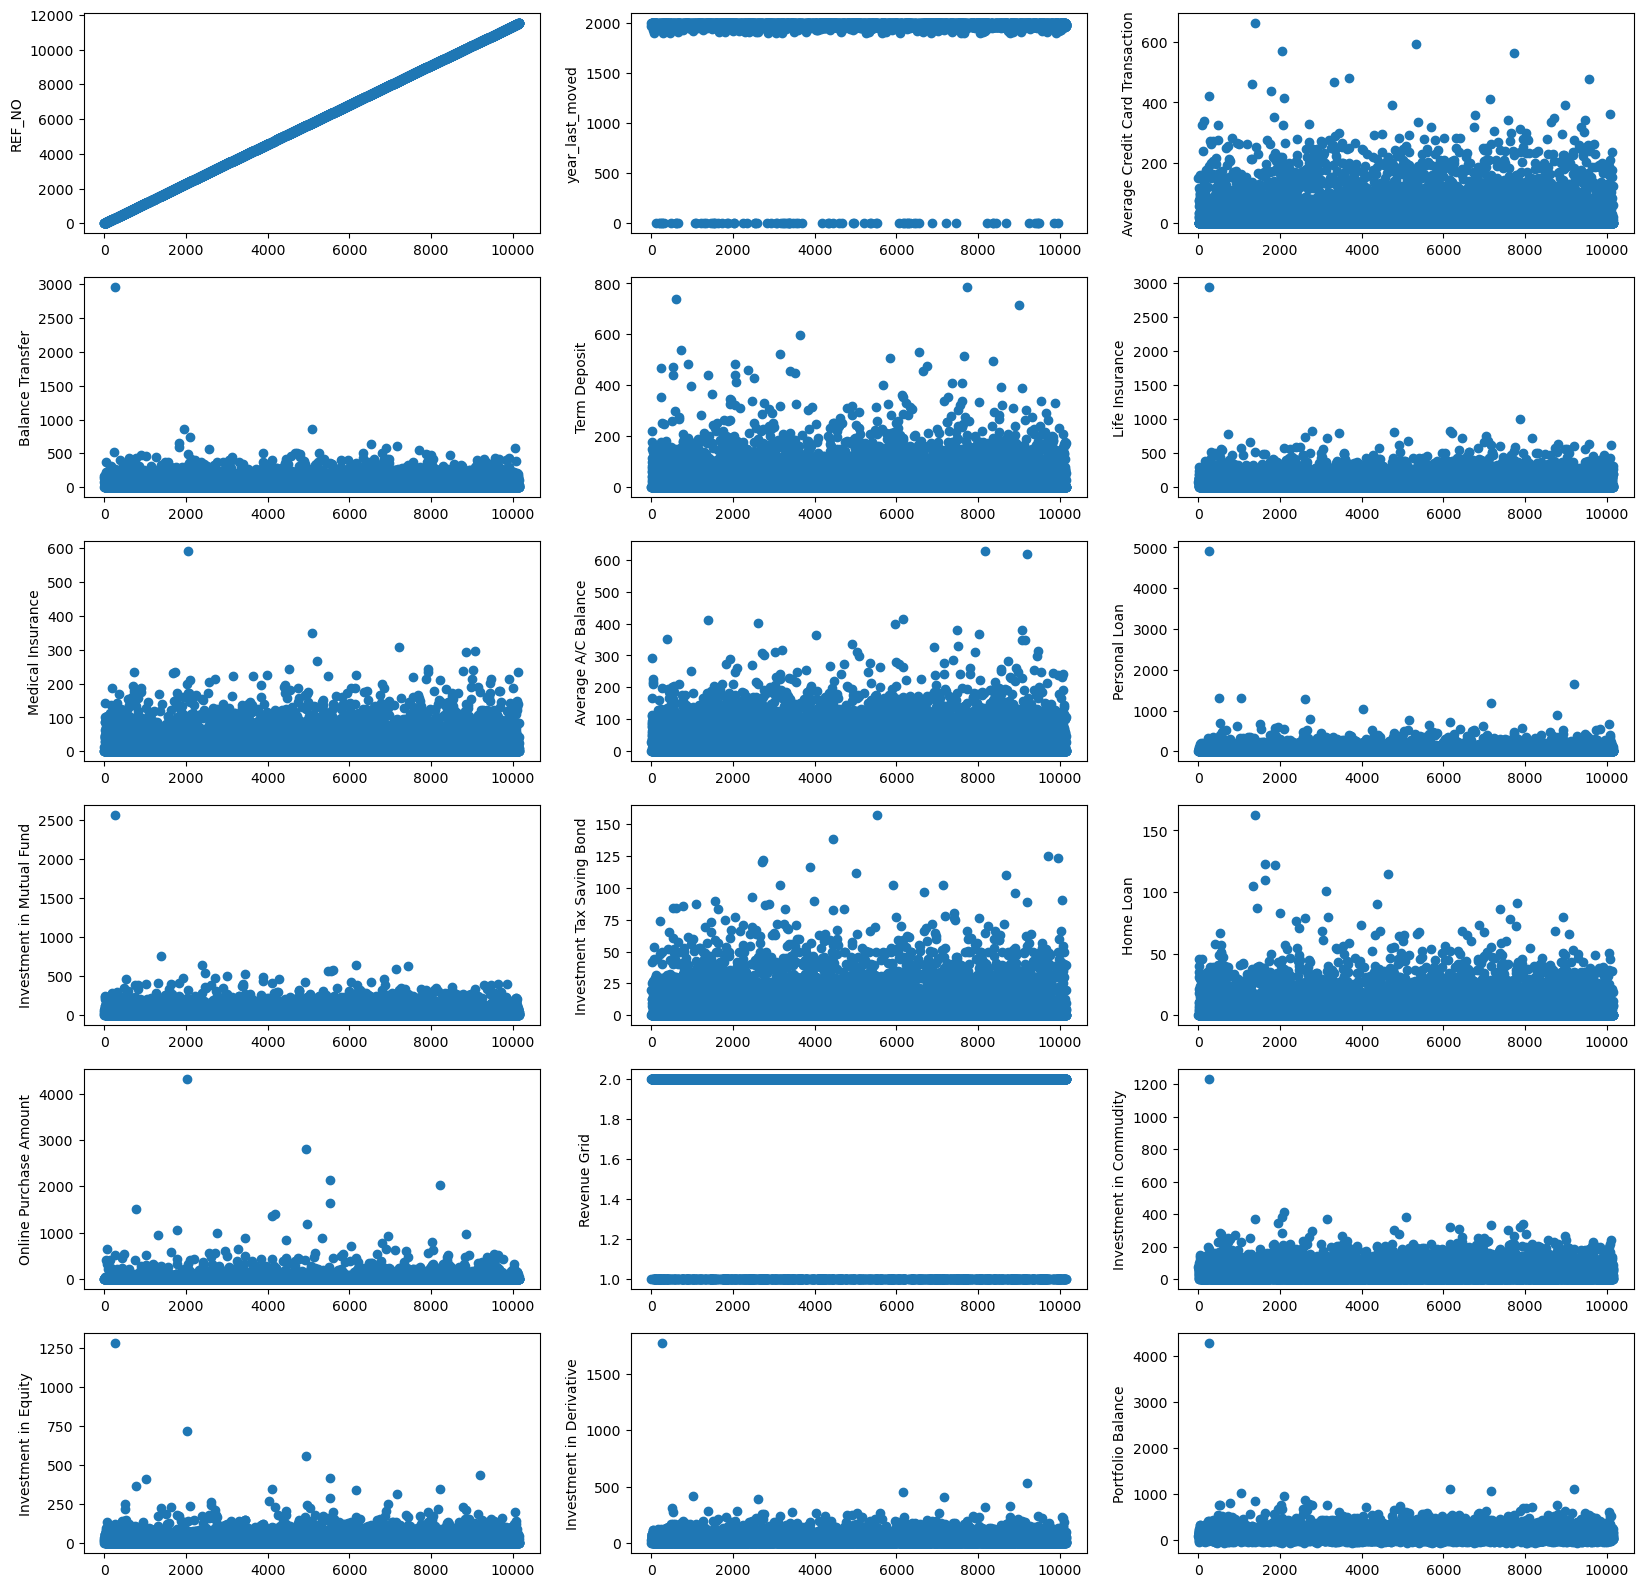

In [178]:
rows = 6
col  = 3
col_index = 0
fig ,ax = plt.subplots(nrows = rows ,ncols = col,figsize = [20,20])
for i in range(rows):
    for j in range(col):
       
        ax[i][j].scatter(y = data[num_name[col_index]],x = num_col.index)
        ax[i][j].set_ylabel(num_name[col_index])
        col_index = col_index + 1

#### Inferences 

- convert children to numeric by converting zeros to 0 +4 to 4
- convert age band and try handeling unknown values same with family income 
- rest are geniune numeric and obejct columns
- tvarea could be dropped and year last moved
- post code and post area have too many unique values to contain information
- all columns are skewed but shouldnt matter while using decision trees and random forest
- ref no could be dropped


#### Outlier Treatment
- balance tranfer,investment in mutual funds potfolio balance and life insurance capped at 2000
- medical insurance and average acc balanace at 500
- personal loan and online purchase amount at 3000
- investment in derivatives ,equity and community at 1000

In [179]:
data.drop('REF_NO',axis = 1,inplace = True)

In [180]:
data.drop("TVarea",axis =1,inplace =True)

In [181]:
data.drop('post_code',axis = 1,inplace =True)
data.drop('post_area',axis = 1,inplace =True)

In [182]:
data.drop('year_last_moved',axis = 1 ,inplace = True)

In [183]:
removed_col = []
removed_col.extend(['REF_NO',"TVarea",'post_code','post_area'])

In [184]:
removed_col.append('year_last_moved')

In [185]:
removed_col

['REF_NO', 'TVarea', 'post_code', 'post_area', 'year_last_moved']

In [186]:
data.head()

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,Average Credit Card Transaction,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,148.44,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,0.00,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,0.00,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,0.00,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,73.45,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         10155 non-null  object 
 1   age_band                         10155 non-null  object 
 2   status                           10155 non-null  object 
 3   occupation                       10155 non-null  object 
 4   occupation_partner               10155 non-null  object 
 5   home_status                      10155 non-null  object 
 6   family_income                    10155 non-null  object 
 7   self_employed                    10155 non-null  object 
 8   self_employed_partner            10155 non-null  object 
 9   Average Credit Card Transaction  10155 non-null  float64
 10  Balance Transfer                 10155 non-null  float64
 11  Term Deposit                     10155 non-null  float64
 12  Life Insurance    

In [188]:
data['children'] = data['children'].str.replace('Zero','0')


In [189]:
data['children'] = data['children'].str.replace('4+' ,'4' ,regex=False)
data['children'].value_counts()

0    6208
1    1848
2    1607
3     473
4      19
Name: children, dtype: int64

In [190]:
# data.loc[data['age_band'] ==  'Unknown','age_band'] = 47.5

In [191]:
# Age_split = data['age_band'].str.split('-',expand = True)

In [192]:
# Age_split.value_counts()

In [193]:
data.isnull().sum()

children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
Average Credit Card Transaction    0
Balance Transfer                   0
Term Deposit                       0
Life Insurance                     0
Medical Insurance                  0
Average A/C Balance                0
Personal Loan                      0
Investment in Mutual Fund          0
Investment Tax Saving Bond         0
Home Loan                          0
Online Purchase Amount             0
Revenue Grid                       0
gender                             0
region                             0
Investment in Commudity            0
Investment in Equity               0
Investment in Derivative           0
Portfolio Balance                  0
d

In [194]:
# Age_split['max'] = pd.to_numeric(Age_split[1],errors = 'coerce')
# Age_split['min'] = pd.to_numeric(Age_split[0],errors = 'coerce')
# Age_split

In [195]:
#Age_split['avg'] = (Age_split['max']+Age_split['min'])/2

In [196]:
# Age_split['avg'].value_counts()

In [197]:
# data['mean_age'] = Age_split['avg']
# data.drop('age_band',axis = 1,inplace =True)

In [198]:
# removed_col.append('age_band')

In [199]:
#data.loc[data['family_income'] == "Unknown",'family_income' ] = 35000

In [200]:
#data['family_income'].nunique()

In [201]:
#data['family_income'] = data['family_income'].str.replace('>=','')

In [202]:
#data['family_income'] = data['family_income'].str.replace('<','')

In [203]:
# data['family_income'].value_counts()

In [204]:
# income_split = data['family_income'].str.split(',',expand = True)

In [205]:
# income_split
# Better to 1 hot encode

### Outlier Treatment

In [206]:
for col in ['Balance Transfer','Investment in Mutual Fund','Portfolio Balance','Life Insurance']:
    data.loc[data[col]>= 1500,col] = 1500
for col in ['Medical Insurance', 'Average A/C Balance']:
    data.loc[data[col]>= 500,col] = 500
for col in ['Personal Loan', 'Online Purchase Amount']:
    data.loc[data[col]>= 2500,col] = 2500
for col in ['Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative']:
    data.loc[data[col]>= 800,col] = 800

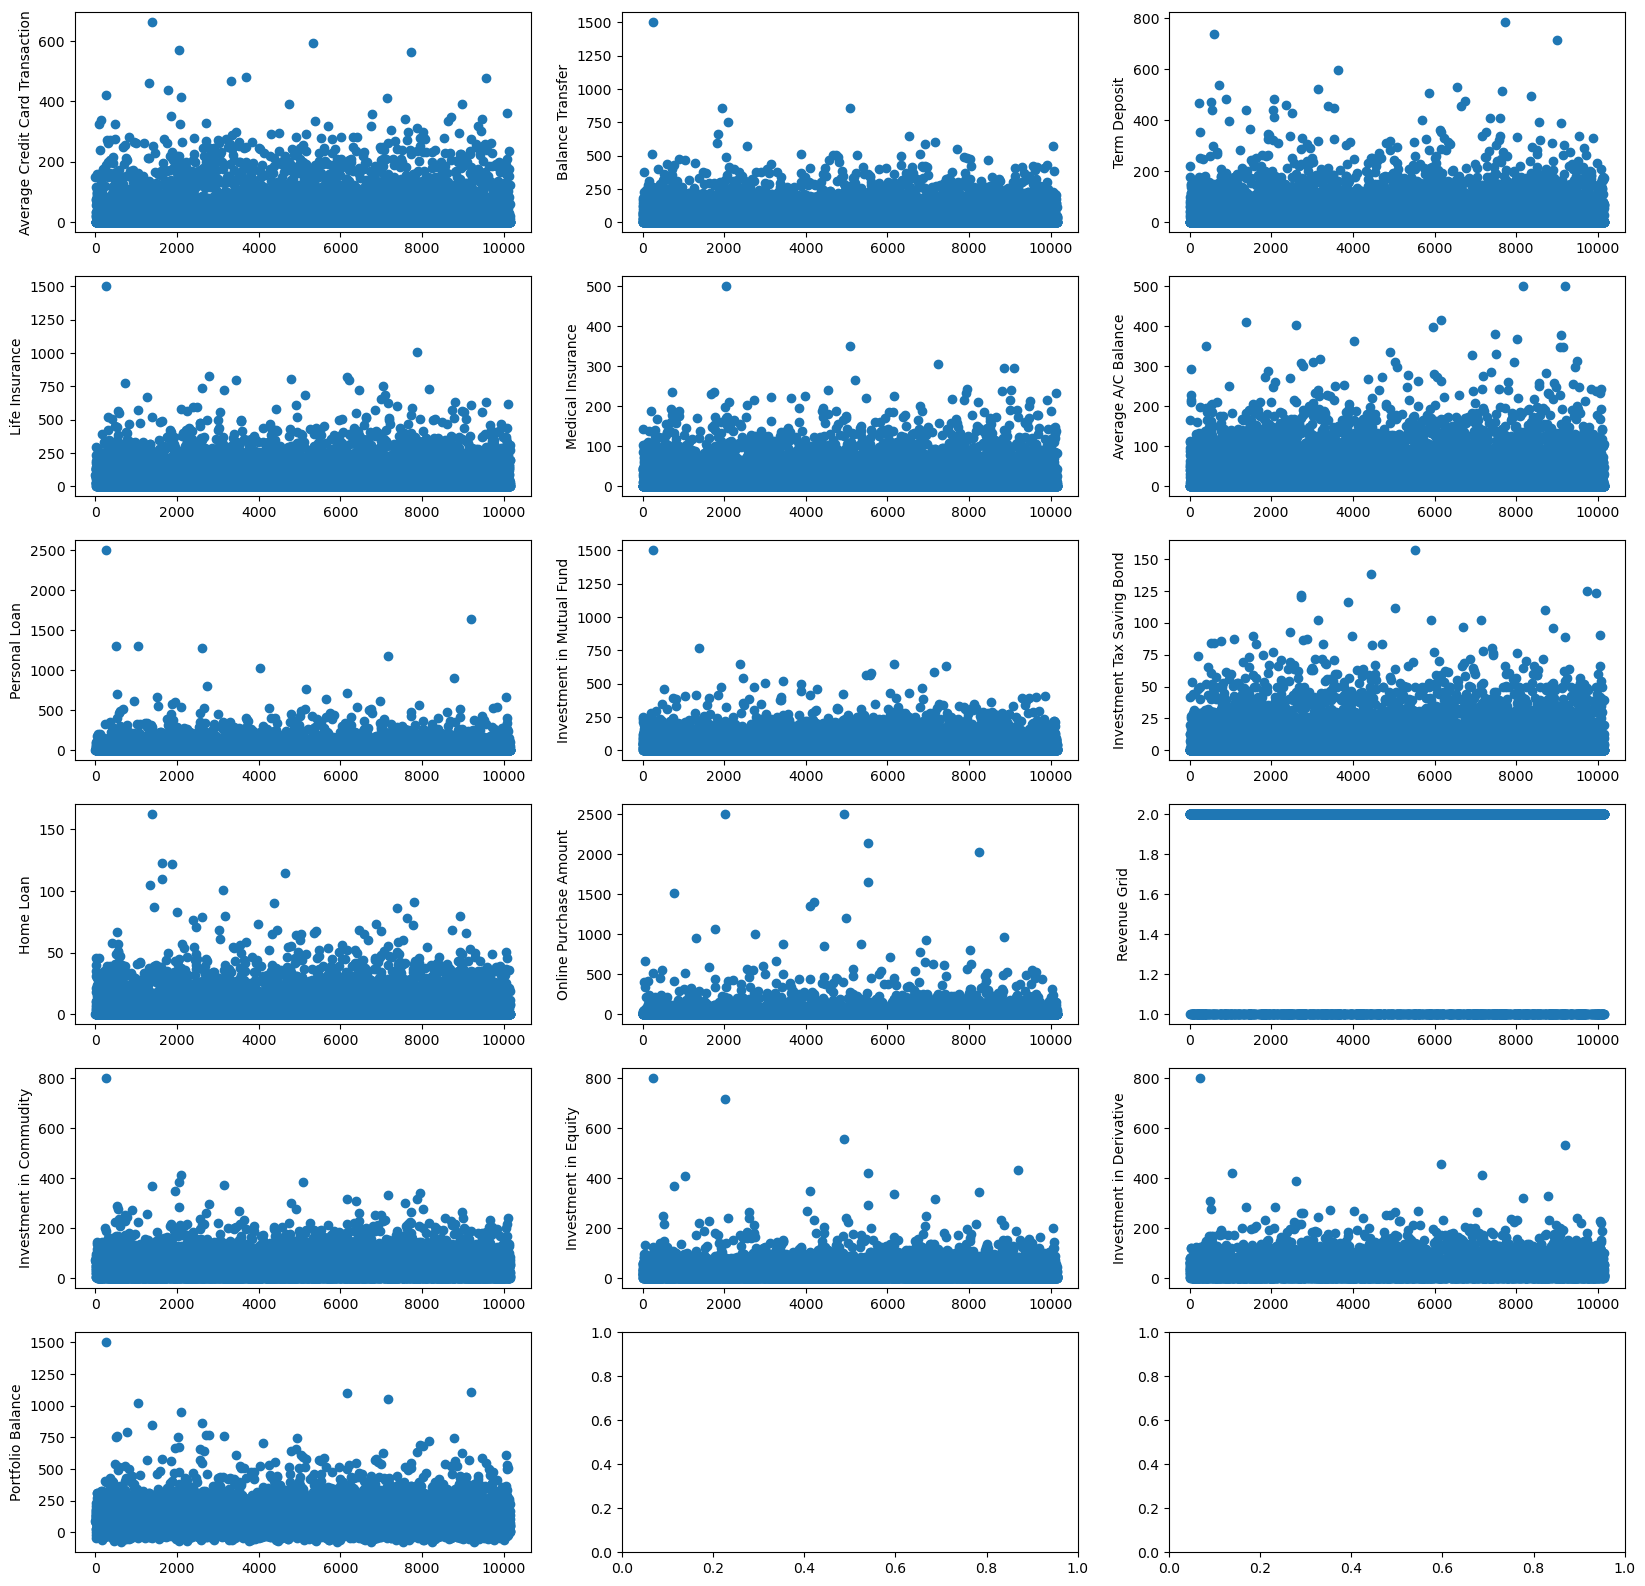

In [207]:
rows = 6
col  = 3
col_index = 0
num_name.remove('REF_NO')
num_name.remove('year_last_moved')
fig ,ax = plt.subplots(nrows = rows ,ncols = col,figsize = [20,20])
for i in range(rows):
    for j in range(col):
        if col_index<16:
            ax[i][j].scatter(y = data[num_name[col_index]],x = num_col.index)
            ax[i][j].set_ylabel(num_name[col_index])
            col_index = col_index + 1

In [208]:
data['children'] = pd.to_numeric(data['children'])

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         10155 non-null  int64  
 1   age_band                         10155 non-null  object 
 2   status                           10155 non-null  object 
 3   occupation                       10155 non-null  object 
 4   occupation_partner               10155 non-null  object 
 5   home_status                      10155 non-null  object 
 6   family_income                    10155 non-null  object 
 7   self_employed                    10155 non-null  object 
 8   self_employed_partner            10155 non-null  object 
 9   Average Credit Card Transaction  10155 non-null  float64
 10  Balance Transfer                 10155 non-null  float64
 11  Term Deposit                     10155 non-null  float64
 12  Life Insurance    

In [210]:
data['family_income'].value_counts()

>=35,000             2517
<27,500, >=25,000    1227
<30,000, >=27,500     994
<25,000, >=22,500     833
<20,000, >=17,500     683
<12,500, >=10,000     677
<17,500, >=15,000     634
<15,000, >=12,500     629
<22,500, >=20,000     590
<10,000, >= 8,000     563
< 8,000, >= 4,000     402
< 4,000               278
Unknown               128
Name: family_income, dtype: int64

In [211]:
corr = data.corr()

<AxesSubplot:>

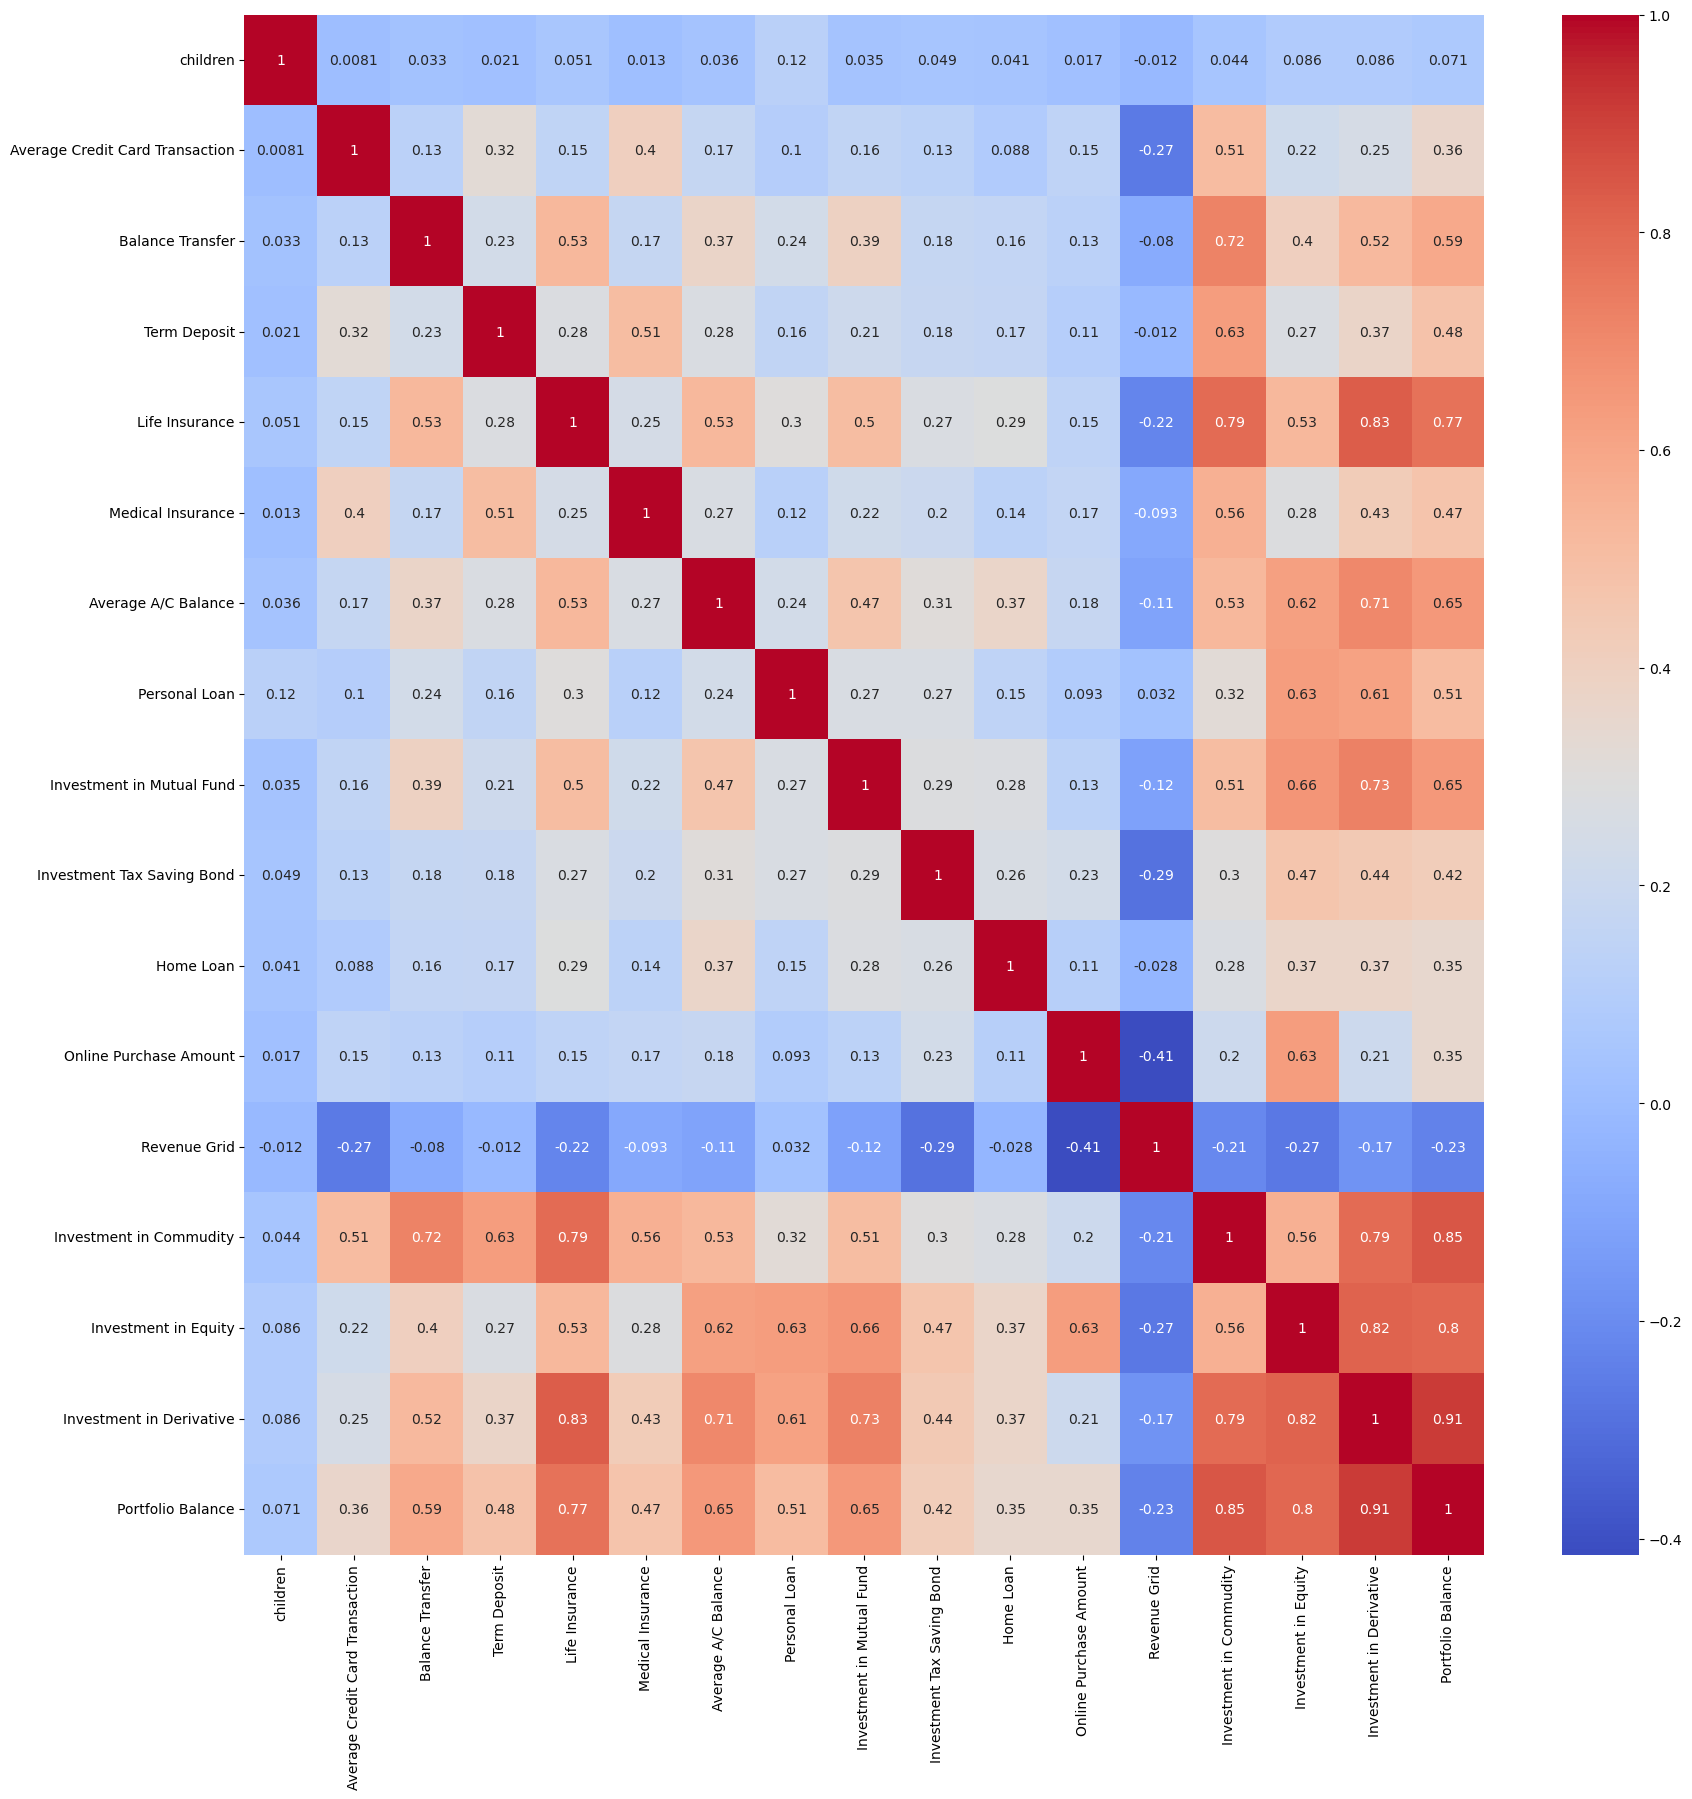

In [212]:
fig  = plt.figure(figsize = [20,20])
sns.heatmap(corr,cmap = 'coolwarm',annot = True)

In [213]:
from sklearn.preprocessing import OneHotEncoder

In [214]:
data.columns

Index(['children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'Average Credit Card Transaction',
       'Balance Transfer', 'Term Deposit', 'Life Insurance',
       'Medical Insurance', 'Average A/C Balance', 'Personal Loan',
       'Investment in Mutual Fund', 'Investment Tax Saving Bond', 'Home Loan',
       'Online Purchase Amount', 'Revenue Grid', 'gender', 'region',
       'Investment in Commudity', 'Investment in Equity',
       'Investment in Derivative', 'Portfolio Balance'],
      dtype='object')

In [215]:
encoder = OneHotEncoder(sparse_output = False,min_frequency = 20,handle_unknown = 'ignore')
x = ['children', 'status', 'occupation', 'occupation_partner', 'home_status',
       'family_income', 'self_employed', 'self_employed_partner','gender', 'region','age_band']
encoder.fit(data[x])

OneHotEncoder(handle_unknown='ignore', min_frequency=20, sparse_output=False)

In [216]:
enc_cols = pd.DataFrame(encoder.transform(data[x]))
enc_cols

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10151,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10152,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10153,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [217]:
enc_cols.columns = encoder.get_feature_names_out(x)

In [218]:
data = pd.concat([data,enc_cols],axis = 1)
data.drop(x,axis = 1,inplace = True)

In [219]:
data.isnull().sum()

Average Credit Card Transaction    0
Balance Transfer                   0
Term Deposit                       0
Life Insurance                     0
Medical Insurance                  0
                                  ..
age_band_55-60                     0
age_band_61-65                     0
age_band_65-70                     0
age_band_71+                       0
age_band_Unknown                   0
Length: 94, dtype: int64

In [220]:
data.loc[data['Revenue Grid']==2,'Revenue Grid'] = 0

In [63]:
data['Revenue Grid'].value_counts()

0    9069
1    1086
Name: Revenue Grid, dtype: int64

In [221]:
data.rename(columns = {'family_income_< 4,000':'family_income_1','family_income_< 8,000, >= 4,000':'family_income_2','family_income_<10,000, >= 8,000':'family_income_3',
       'family_income_<12,500, >=10,000':'family_income_4' ,'family_income_<15,000, >=12,500':'family_income_5',
       'family_income_<17,500, >=15,000':'family_income_6', 'family_income_<20,000, >=17,500':'family_income_7',
       'family_income_<22,500, >=20,000':'family_income_8', 'family_income_<25,000, >=22,500':'family_income_9',
       'family_income_<27,500, >=25,000':'family_income_10', 'family_income_<30,000, >=27,500':'family_income_11',
       'family_income_>=35,000':'family_income_12'},inplace = True)



## Modelling

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [223]:
features = data.drop('Revenue Grid',axis = 1)
target = data['Revenue Grid']

In [224]:
train_feature,val_feature, train_target,val_target = train_test_split(features,target,test_size = 0.2,stratify = target)

In [225]:
train_target.value_counts(normalize = True),val_target.value_counts(normalize = True)

(0    0.893033
 1    0.106967
 Name: Revenue Grid, dtype: float64,
 0    0.893156
 1    0.106844
 Name: Revenue Grid, dtype: float64)

In [226]:
train_target.shape,val_target.shape

((8124,), (2031,))

In [227]:
dtc  = DecisionTreeClassifier()
rfc = RandomForestClassifier()
logreg = LogisticRegression()

In [ ]:
# param_lr = {'penalty':['l1','l2'],
#            'C':[0.5,1.5,2],
#            'class_weight':[{0:1,1:2},{0:1,1:3},{0:0.5,1:2},{0:0.5,1:3}],
#            'max_iter':[1000,2000,3000],
#            'solver':['liblinear']}


# search_lr = GridSearchCV(estimator = logreg,param_grid = param_lr,
#                           scoring = 'f1',
#                          return_train_score=True,cv = 5)


# search_lr.fit(features,target)

In [ ]:
# result_logreg = pd.DataFrame(search_lr.cv_results_ )

In [ ]:
#result_logreg[['params','mean_test_score','mean_train_score']].sort_values(by = "mean_test_score",ascending=False)

In [ ]:
#result_dtc.loc[result_dtc['mean_test_score'].idxmax(),'params']

In [280]:
xgb = XGBClassifier(verbosity = 0)


param_xgb = {'eta':[0.3,0.1,0.2,0.01],
             'max_depth':[3],
             'n_estimators':[100,250,500],
             'min_child_weight':[17,18],
             'reg_lamda':[0,0.5,1,2,3],
             'alpha':[0,0.5,1,2,3],      
             'scale_pos_weight':[7.5,10,12.5,15]
}


search_xgb = GridSearchCV(estimator = xgb,
                          param_grid = param_xgb,
                          scoring = 'f1',
                         return_train_score=True,
                          cv = 5)


search_xgb.fit(features,target)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'alpha': [0, 0.5, 1, 2, 3],
                         'eta': [0.3, 0.1, 0.2, 0.01], 'max_depth': [3],
                         'min_child_weight': [17, 18],
                         'n_estimators': [100, 250, 500],
                         'reg_lamda': [0, 0.5, 1, 2, 3],
                         'scale_pos_weight': [7.5, 10, 12.5, 15]},
             return_train_score=True, scoring='f1')

In [281]:
xgb_results = pd.DataFrame(search_xgb.cv_results_)
xgb_results = xgb_results[['params','mean_test_score','rank_test_score','mean_train_score']]

In [282]:
xgb_results.to_csv('xgb_result.csv')

In [278]:
# params_rfc = {'n_estimators':[100,200,300],
#              'max_depth':[6,7,8],
#              'class_weight':[{0:1,1:2},{0:1,1:5},{0:1,1:9}],
#              'min_samples_split':[5,10,15],
#              'max_features':['sqrt', 'log2'],
#               'max_samples':[0.5,0.75,1] 
#              }



# rfc = RandomForestClassifier()


# search_rfc = GridSearchCV(estimator = rfc,
#                           param_grid = params_rfc,
#                           scoring = 'f1',
#                          return_train_score=True,
#                           cv = 5)


# search_rfc.fit(features,target)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 5},
                                          {0: 1, 1: 9}],
                         'max_depth': [6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'max_samples': [0.5, 0.75, 1],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='f1')

In [279]:
# rfc_results = pd.DataFrame(search_rfc.cv_results_)
# rfc_results = rfc_results[['params','mean_test_score','rank_test_score','mean_train_score']]
# rfc_results.to_csv('random_remax_samplessult.csv')

In [262]:
# rfc = RandomForestClassifier(class_weight= 'balanced', criterion= 'entropy', max_depth= 8, max_samples= 0.7, min_samples_split= 5, n_estimators= 70)



# rfc.fit(train_feature,train_target)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_samples=0.7, min_samples_split=5,
                       n_estimators=70)

In [264]:
# pred_train = rfc.predict(train_feature)

# pred_val  = rfc.predict(val_feature)

In [266]:
# print(f1_score(train_target,pred_train))
# print(f1_score(val_target,pred_val))


0.812133072407045
0.746031746031746


In [270]:
# gboost = GradientBoostingClassifier()


# params_gb = {'n_estimators':[100,200,300,500],
#             'learning_rate':[0.1,0.01,0.2],
#              'max_depth':[3,4,5],
#             'subsample':[0.1,0.5,0.75],
#             'min_samples_split':[5,10,15,20]}


# gb_search  = GridSearchCV(estimator = gboost,
#                           param_grid = params_gb,
#                           scoring = 'f1',
#                          return_train_score=True,
#                           cv = 5)


gb_search.fit(features,target)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 500],
                         'subsample': [0.1, 0.5, 0.75]},
             return_train_score=True, scoring='f1')

In [273]:
# gboost_results = pd.DataFrame(gb_search.cv_results_)
# gboost_results = gboost_results[['params','mean_test_score','rank_test_score','mean_train_score']]
# gboost_results.to_csv('gboost_result.csv')

In [309]:
xgb_model = XGBClassifier(alpha= 0.25, eta= 0.3, max_depth =  2,
                          min_child_weight = 17, n_estimators = 500, 
                          reg_lambda =  3, scale_pos_weight =  7.5)


xgb_model.fit(train_feature,train_target)

XGBClassifier(alpha=0.25, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=17, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [310]:
test_pred = xgb_model.predict(val_feature)
train_pred = xgb_model.predict(train_feature)

In [313]:
print('Train F1 score = {} \nTest F1 score = {}'.format(f1_score(train_target,train_pred),f1_score(val_target,test_pred)))

Train F1 score = 0.9623477297895902 
Test F1 score = 0.8609865470852018
